# Computational Chemistry

This demo aims to introduce how Python can be applied in a Chemistry context. We will focus on reactions and kinetics, by utilising some datasets and analysing them to visualise trends.

The data used in this demo has been taken from these GitHub repositories:

https://github.com/rxn4chemistry/rxn_yields/blob/master/data/Suzuki-Miyaura/aap9112_Data_File_S1.xlsx and taken from this paper https://pmc.ncbi.nlm.nih.gov/articles/PMC8949728/ (file used is `reaction_data_suzuki.csv`)

https://github.com/flboudoire/chemical-kinetics/blob/master/examples/simple_example/data/concentrations%20vs%20time.csv with documentation here https://chemical-kinetics.readthedocs.io/en/latest/index.html (file used is `concentrations_vs_time.csv`)

---

## How to use Jupyter

In Jupyter notebooks code can be run cell by cell. Cells are like textboxes which let you input code and comments, and the play button  lets you run cells individually. The fast forward button  lets you run the entire notebook. You can also press Shift+Enter to run cells individually.

Some of the cells can be run as they are and others will require you to input some code before running. It will be specified which you need to do.

---

## Part 1 - reaction data

This part of the demo will focus on a dataset containing reaction data.

The reaction used is the Suzuki-Miyaura (sometimes just called Suzuki) reaction, a type of coupling reaction with a palladium catalyst.

This is quite a bit beyond what is covered in A-level (and is more university level) but if you would like to find out more about the reaction and its mechanism, visit this link: https://www.sciencedirect.com/science/article/pii/S0277538722004764.

First, we will import the _libraries_ that we require - these are pre-written packages that have various different functionalities. Most of them are imported in the format `import X as Y`, where `X` is the full name of the library and `Y` is an abbreviation for it - you can put anything you want as the name for `Y`, but there is normally a naming convention for each library, such as `pandas` being shortened to `pd`, to create consistency across code.
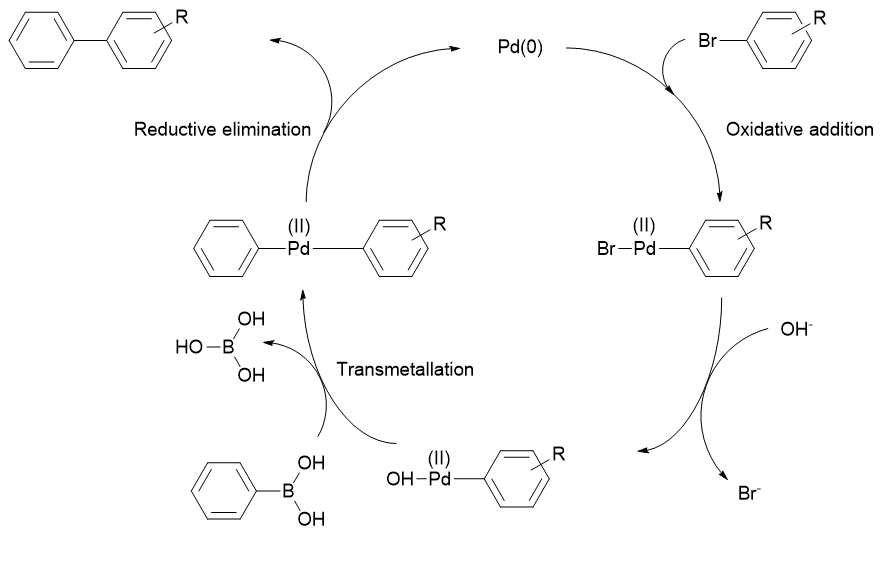
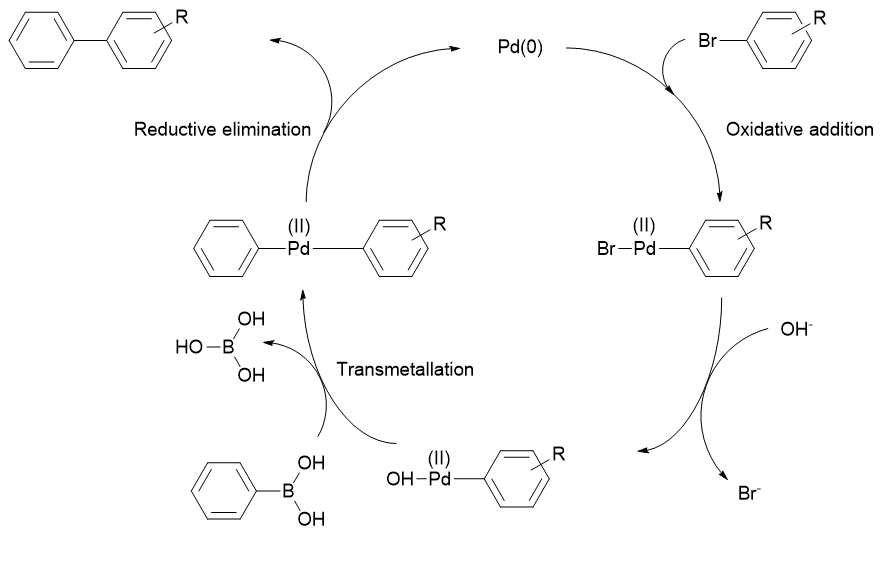

In [1]:
# Run this cell as it is
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import rdkit
from sklearn.linear_model import LinearRegression

You will notice that there is a _directory_ (folder) called "data". There are some files within it, which we will be analysing in this demo. They have been saved in a .csv (comma separated values) format, which makes it easy to process and clean if necessary.


The library we will be using to read in this data is called `pandas` which derives its name from the term _panel data_, used in econometrics to refer to multi-dimensional structured data, often involving measurements over time. There is a specific function to do read data in a .csv format, `read_csv()`.

In [2]:
# Run this cell as it is
data_filename = "data/reaction_data_suzuki.csv"
data = pd.read_csv(data_filename)

We have created a variable called `data` which contains a table of information that we have extracted from a file. We can preview the first few rows of the table using `.head()`.

In [3]:
data.head()

,Reaction_No,Reactant_1_Name,Reactant_1_Short_Hand,Reactant_1_eq,Reactant_1_mmol,Reactant_2_Name,Reactant_2_eq,Catalyst_1_Short_Hand,Catalyst_1_eq,Ligand_Short_Hand,Ligand_eq,Reagent_1_Short_Hand,Reagent_1_eq,Solvent_1_Short_Hand,Product_Yield_PCT_Area_UV,Product_Yield_Mass_Ion_Count
0,1,6-chloroquinoline,"1a, 6-Cl-Q",1,0.0004,"2a, Boronic Acid",1,Pd(OAc)2,0.0625,P(tBu)3,0.125,NaOH,2.5,MeCN,4.764109,6262.058822
1,2,6-chloroquinoline,"1a, 6-Cl-Q",1,0.0004,"2a, Boronic Acid",1,Pd(OAc)2,0.0625,P(Ph)3,0.125,NaOH,2.5,MeCN,4.120962,13245.570910
2,3,6-chloroquinoline,"1a, 6-Cl-Q",1,0.0004,"2a, Boronic Acid",1,Pd(OAc)2,0.0625,AmPhos,0.125,NaOH,2.5,MeCN,2.583837,3009.165946
3,4,6-chloroquinoline,"1a, 6-Cl-Q",1,0.0004,"2a, Boronic Acid",1,Pd(OAc)2,0.0625,P(Cy)3,0.125,NaOH,2.5,MeCN,4.443171,30860.698260
4,5,6-chloroquinoline,"1a, 6-Cl-Q",1,0.0004,"2a, Boronic Acid",1,Pd(OAc)2,0.0625,P(o-Tol)3,0.125,NaOH,2.5,MeCN,1.949874,2486.306423


We can see that the dataset contains several columns. Some of the columns won't be used in this demo, but the ones that are relevant to us are: 
- Reactant_1_Name: chemical name of the reactant
- Reactant_2_Name: chemical name of the reactant
- Ligand_Short_Hand: abbreviation
- Ligand_eq: equivalents
- Product_Yield_PCT_Area_UV: this is a way of calculating the yield of the product using the UV detected peak area of a HPLC (high-performance liquid chromatography) spectrum
- Product_Yield_Mass_Ion_Count: the yield given from the intensity of ion signals detected in mass spectrometry
These measures of product yield are not too important to focus on for this demo, but you can read more about them if you wish

_SMILES strings_ (which are like the structural formula of a compound) are a useful way to determine structures of molecules. We can use chemical manufacturer websites such as https://www.fishersci.co.uk/gb/en/home.html or https://www.sigmaaldrich.com/GB/en to search for compounds and it should show the SMILES string in the product description. Additionally, there is also a useful database, Reaxys, in which you can search for the compounds and you will be provided with the SMILES string amongst other useful information such as literature (research papers) that feature the compound, experimentally determined melting and boiling points and even IR or NMR spectra. Here is the link for Reaxys: https://www.reaxys.com/#/search/quick/query (you may need to create an account first to be able to search for molecules). SciFinder (https://scifinder-n.cas.org/) is another similar database.

We can see that from the first few rows, reactant 1 is given as 6-chloroquinoline. We can look up its SMILES string and use the RDKit library to extract its molecular structure using the function `rdkit.Chem.MolFromSmiles()`:

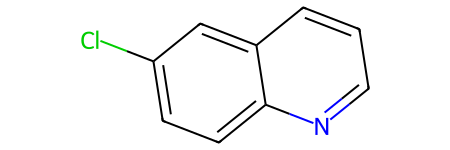

In [4]:
# Run this cell as it is
rdkit.Chem.MolFromSmiles("ClC1=CC=C2N=CC=CC2=C1")

This is essentially using the SMILES string given to piece together the chemical structure of the molecule

Reactant 2 is given as boronic acid, which is a class of compounds rather than a specific one. An example of a boronic acid (pyridine-4-boronic acid) is shown here.

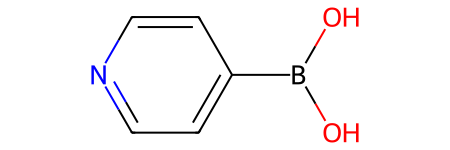

In [5]:
# Run this cell as it is
rdkit.Chem.MolFromSmiles("OB(O)C1=CC=NC=C1") # example of a boronic acid

**Question (1): Find another example of a boronic acid and find its SMILES string using the links given above. Use the `rdkit.Chem.MolFromSmiles()` function to find its display formula.**

*Add some text to the cell below and press the &#9205; Run button (play symbol). To run all the cells again in order press the &#9193; button (fast-forward symbol) and then select the red "Restart and Run All Cells" option.*

In [6]:
## ADD TEXT HERE


Here we will now extract individual columns from the database for reactant 1 and reactant 2. 

We're going to save out the results for both reactants to two separate names for easier access:

In [7]:
# Run this cell as it is
Reactant_1_Name = data["Reactant_1_Name"]
Reactant_2_Name = data["Reactant_2_Name"]

We can also do something called _filtering_, where we can extract the data from a particular column that only meets the conditions we pose.

For example, from looking at the data either on this notebook or in the original file, we can see there are many different reactant 1s and reactant 2s. We can filter out the data so that the only reactant 1 present is `6-chloroquinoline`, and the only reactant 2 present is `2a, Boronic Acid`. This will make it easier to compare other factors while keeping the reactants the same.

In [8]:
# Run this cell as it is
r1 = Reactant_1_Name[(Reactant_1_Name == "6-chloroquinoline") & (Reactant_2_Name == "2a, Boronic Acid")]
r2 = Reactant_2_Name[(Reactant_1_Name == "6-chloroquinoline") & (Reactant_2_Name == "2a, Boronic Acid")]

We will do the same for the ligand and product yield columns - for now we will use the `Product_Yield_PCT_Area_UV` column as our measure for the yield:

In [9]:
# Run this cell as it is
Ligand_Short_Hand = data["Ligand_Short_Hand"]
ligand = Ligand_Short_Hand[(Reactant_1_Name == "6-chloroquinoline") & (Reactant_2_Name == "2a, Boronic Acid")]
Product_Yield_PCT_Area_UV = data["Product_Yield_PCT_Area_UV"]
yield_uv = Product_Yield_PCT_Area_UV[(Reactant_1_Name == "6-chloroquinoline") & (Reactant_2_Name == "2a, Boronic Acid")]

There are many ways to visualise data in Python (e.g. line graphs, scatter plots, bar charts) however it depends on what type of data you have. There are multiple different libraries that can be used to plot these graphs but as an example we will use `seaborn`. `seaborn` is a library for making statistical graphics - it builds on top of `matplotlib` and integrates closely with `pandas` data structures. (more information here: https://seaborn.pydata.org/tutorial/introduction)

Here we are comparing the type of ligand (a `string` data type) with the yield (a `float` data type) and there are fewer ligand types than the number of different yield values. We have a few options for our data visualisation and the graphs are shown here as well as the corresponding documentation.

Box plot: https://seaborn.pydata.org/generated/seaborn.boxplot.html

Violin plot: https://seaborn.pydata.org/generated/seaborn.violinplot.html

Strip plot - shows all data points with _jitter_ to avoid overlap: https://seaborn.pydata.org/generated/seaborn.stripplot.html

Bar plot - shows the mean yield with the variability: https://seaborn.pydata.org/generated/seaborn.barplot.html

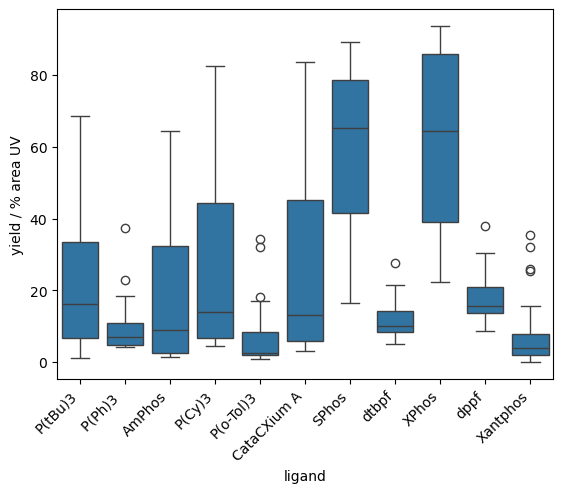

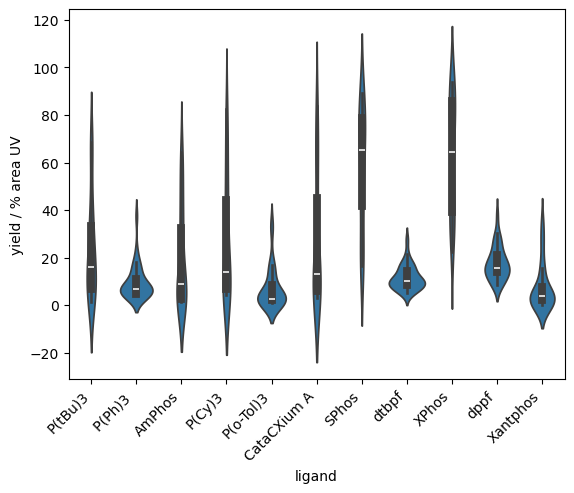

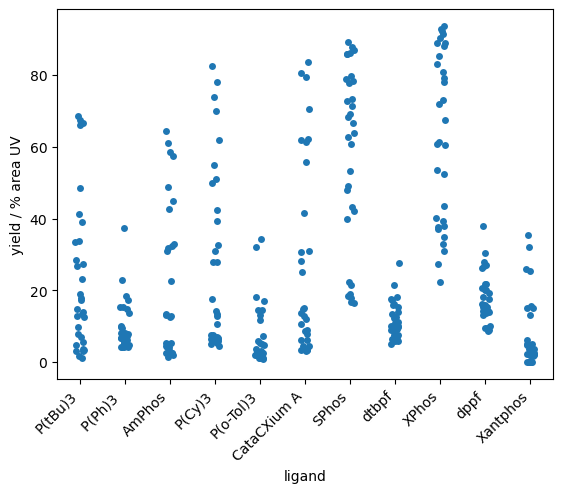

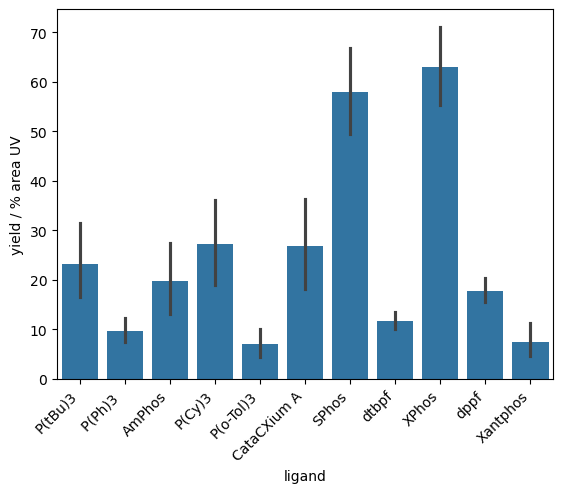

In [10]:
# Run this cell as it is
# Box plot
sns.boxplot(x = ligand, y = yield_uv)
plt.xlabel("ligand")
plt.ylabel("yield / % area UV")
plt.xticks(rotation = 45, ha = 'right') # this part just rotates the x axis labels so that they don't overlap and can be read properly
plt.show()

# Violin plot
sns.violinplot(x = ligand, y = yield_uv, data = data)
plt.xlabel("ligand")
plt.ylabel("yield / % area UV")
plt.xticks(rotation = 45, ha = 'right') # this part just rotates the x axis labels so that they don't overlap and can be read properly
plt.show()

# Strip plot
sns.stripplot(x = ligand, y = yield_uv, data = data, jitter = True)
plt.xlabel("ligand")
plt.ylabel("yield / % area UV")
plt.xticks(rotation = 45, ha = 'right') # this part just rotates the x axis labels so that they don't overlap and can be read properly
plt.show()

# Bar plot
sns.barplot(x = ligand, y = yield_uv, data = data)
plt.xlabel("ligand")
plt.ylabel("yield / % area UV")
plt.xticks(rotation = 45, ha = 'right') # this part just rotates the x axis labels so that they don't overlap and can be read properly
plt.show()

We can now do the same thing but using the `Product_Yield_Mass_Ion_Count` column as our measure for yield.

In [11]:
# Run this cell as it is
Product_Yield_Mass_Ion_Count = data["Product_Yield_Mass_Ion_Count"]
yield_ion = Product_Yield_Mass_Ion_Count[(Reactant_1_Name == "6-chloroquinoline") & (Reactant_2_Name == "2a, Boronic Acid")]

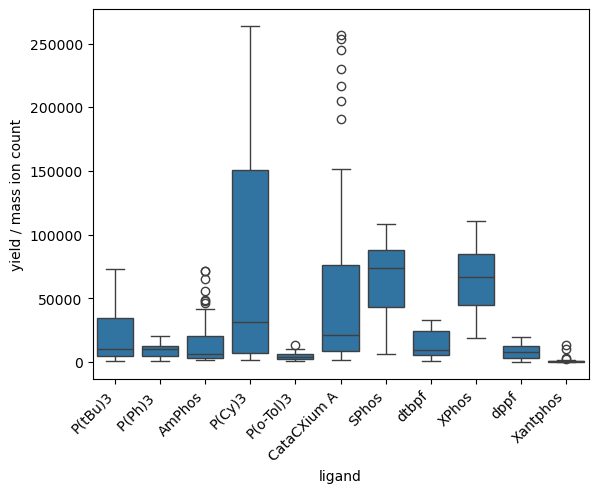

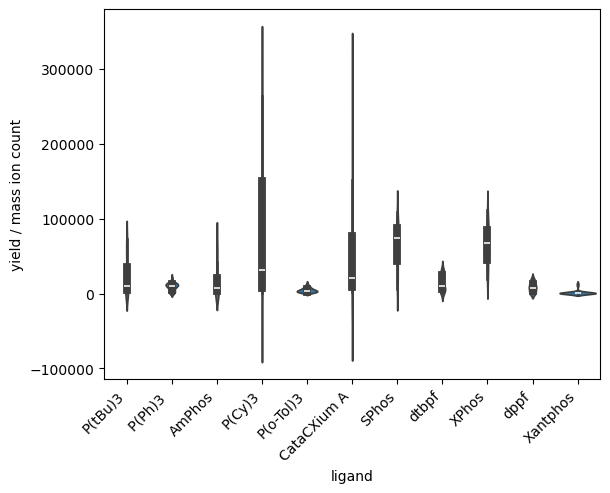

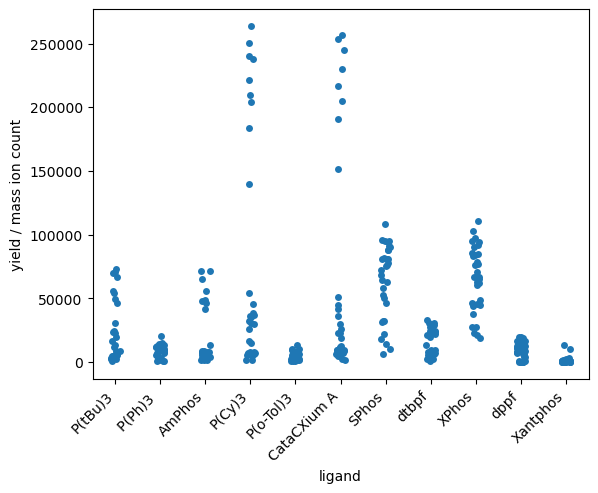

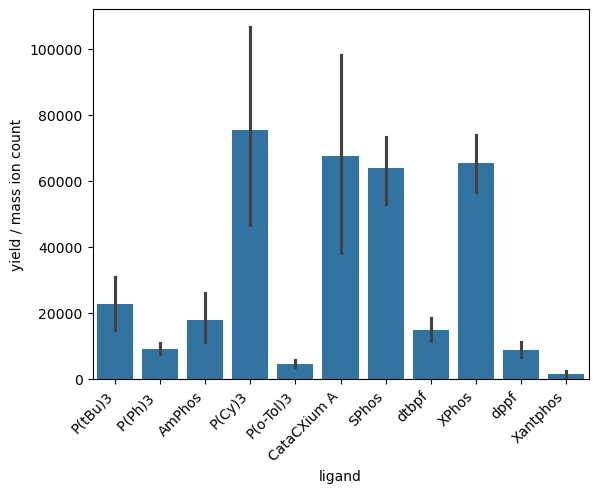

In [12]:
# Run this cell as it is
# Box plot
sns.boxplot(x = ligand, y = yield_ion)
plt.xlabel("ligand")
plt.ylabel("yield / mass ion count")
plt.xticks(rotation = 45, ha = 'right') # this part just rotates the x axis labels so that they don't overlap and can be read properly
plt.show()

# Violin plot
sns.violinplot(x = ligand, y = yield_ion, data = data)
plt.xlabel("ligand")
plt.ylabel("yield / mass ion count")
plt.xticks(rotation = 45, ha = 'right') # this part just rotates the x axis labels so that they don't overlap and can be read properly
plt.show()

# Strip plot
sns.stripplot(x = ligand, y = yield_ion, data = data, jitter = True)
plt.xlabel("ligand")
plt.ylabel("yield / mass ion count")
plt.xticks(rotation = 45, ha = 'right') # this part just rotates the x axis labels so that they don't overlap and can be read properly
plt.show()

# Bar plot
sns.barplot(x = ligand, y = yield_ion, data = data)
plt.xlabel("ligand")
plt.ylabel("yield / mass ion count")
plt.xticks(rotation = 45, ha = 'right') # this part just rotates the x axis labels so that they don't overlap and can be read properly
plt.show()

**Question (2): Have a look at these graphs - what are the advantages and disadvantages of representing data in each case? Consider the clarity and effectiveness of each data visualisation method.**

*Discuss this in groups and add some text to the cell below. Placing a # before the text will tell Python it's a comment, so if you run the cell there won't be an error message.*

In [13]:
## ADD TEXT HERE
#
#

There are a few things we can unpick from these graphs.

- Lots of the ligand types give a very wide range of yields, causing the "whiskers" of the plot to be far apart
- Some of the ligand types give a very small range of yields such as Xantphos, however it also has many anomalies (the circles shown).

---

## Part 2 - concentration and time data

In this part of the demo we will have a look at a different set of data for an arbitrary chemical reaction. The data looks at the concentrations of 3 different reagents over a period of time, and we will then use a particular machine learning technique called _linear regression_ to predict the concentration of one of the reagents at a given time.

When we talk about using computers to extract information from data, automatically learning and improving through the use of that data, we are really talking about machine learning. Machine learning is a broad term that applies to a wide range of methods, and one of the simplest techniques is the linear fit, or linear regression. Essentially what this involves is using the data given to create a line of best fit for the graph, and we can then use this to extrapolate or predict data points outside the current given range, as well as interpolate (predicting data points within the range).

Again, we will read in the dataset that we need using `pandas`. We will preview the first few rows to get an idea of the data.

In [14]:
# Run this cell as it is
data_filename_2 = "data/concentrations_vs_time.csv"
data_2 = pd.read_csv(data_filename_2, sep = ",")
data_2.head()

,t,A,B,C
0,0.000000,0.931115,0.000000,0.189851
1,2.040816,0.871808,0.184354,0.195828
2,4.081633,0.689588,0.332521,0.195189
3,6.122449,0.523002,0.421037,0.245908
4,8.163265,0.463176,0.463408,0.265259


The dataset contains columns for time (`t`) in seconds, and the concentrations in mol dm$^{-3}$ for 3 different compounds (arbitrarily named `A`, `B` and `C`). We can create variables for each of these columns and then plot them on a graph to look at the behaviour these compounds over time.

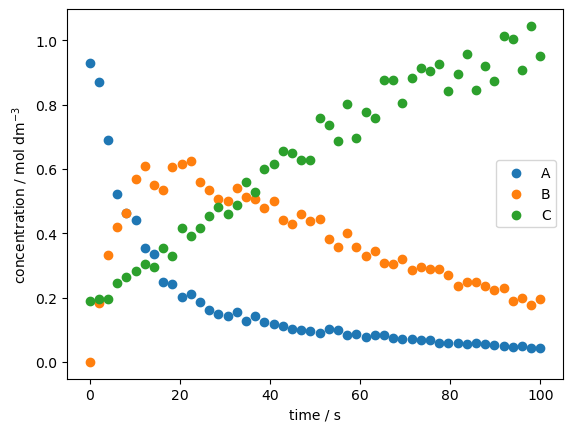

In [15]:
# Run this cell as it is
t = data_2["t"]
A = data_2["A"]
B = data_2["B"]
C = data_2["C"]

plt.scatter(t, A, label = "A")
plt.scatter(t, B, label = "B")
plt.scatter(t, C, label = "C")
plt.xlabel("time / s")
plt.ylabel("concentration / mol dm$^{-3}$")
plt.legend()
plt.show()

Here from the graph, we can see that A is likely to be the reactant as it shows a decrease over time. C is likely to be the product as it shows an increase over time. B seems to show a mix of both, suggesting that it is an intermediate - formed when A reacts, and then reacting itself to form C. 

The plot mainly shows clean trends, but we can see that for C the points become bunched together towards the end of the graph. We can use something called a rolling average to clean up the points.

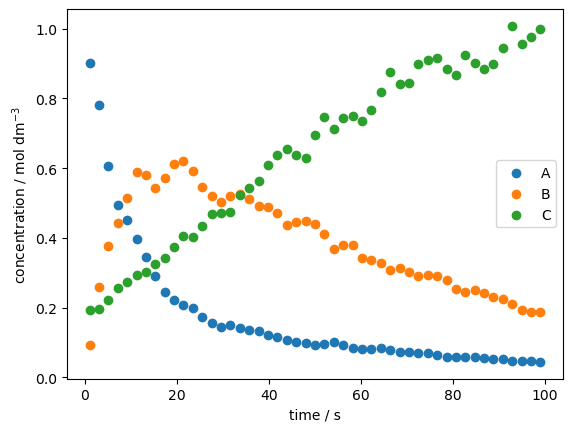

In [16]:
# Run this cell as it is
data_rolling_average = data_2.rolling(2).mean() # try adjusting this number
data_rolling_average
t_rolling_average = data_rolling_average["t"]
A_rolling_average = data_rolling_average["A"]
B_rolling_average = data_rolling_average["B"]
C_rolling_average = data_rolling_average["C"]
plt.scatter(t_rolling_average, A_rolling_average, label = "A")
plt.scatter(t_rolling_average, B_rolling_average, label = "B")
plt.scatter(t_rolling_average, C_rolling_average, label = "C")
plt.xlabel("time / s")
plt.ylabel("concentration / mol dm$^{-3}$")
plt.legend()
plt.show()

The parameter (value inside the brackets for `data_2.rolling()`) is the window that the rolling average is taken for. Something to note is that the larger the number, the smoother the plot becomes, but if the number is too large (such as 20), the graph begins to lose its shape. The data will also no longer start at t = 0 but at the number entered.

As you may know from A-level Chemistry, reactants in a chemical reaction can be zeroth, first or second order depending on how concentration varies with time. They will each have distinctive graph shapes:
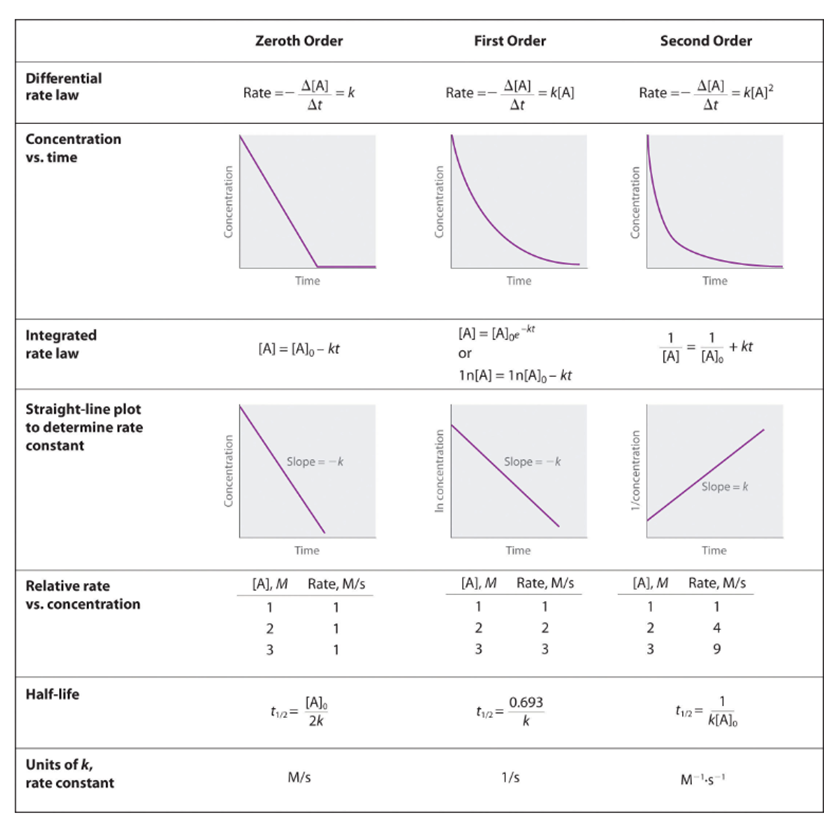

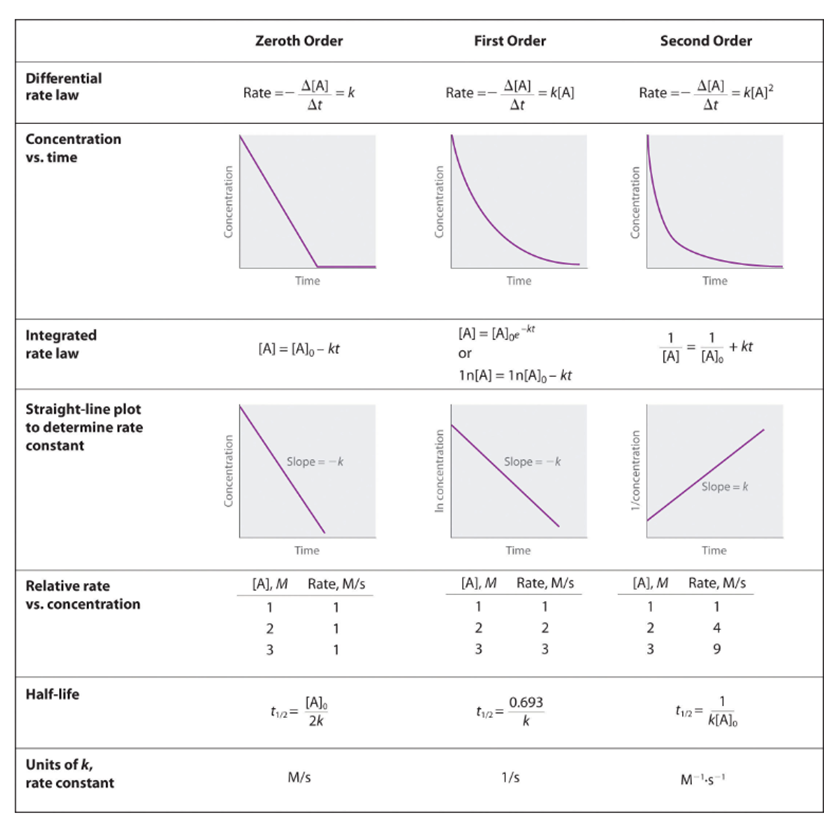
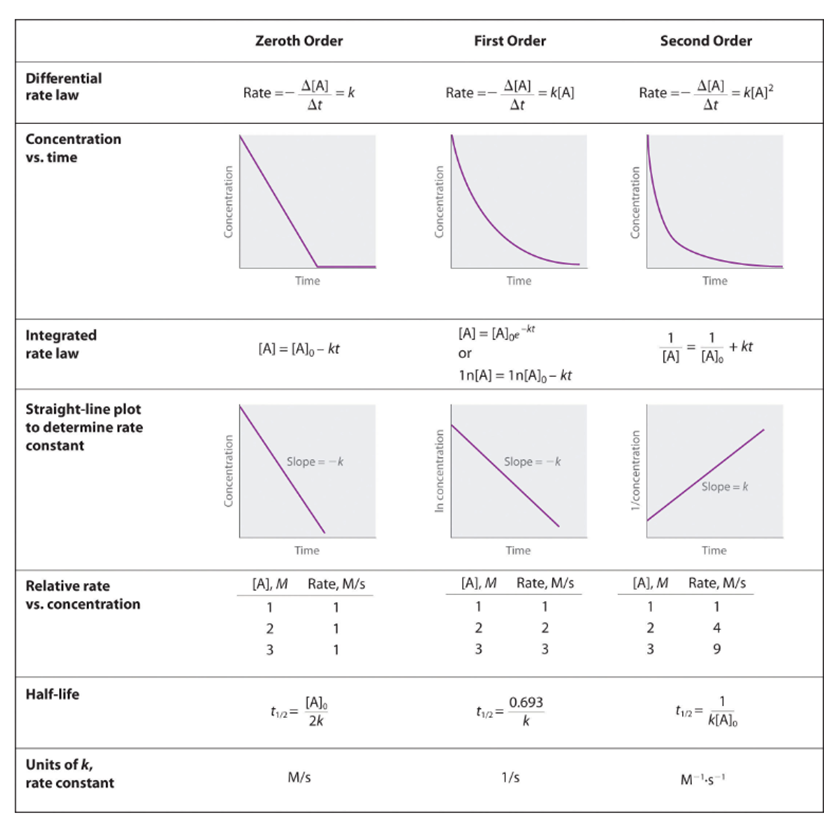
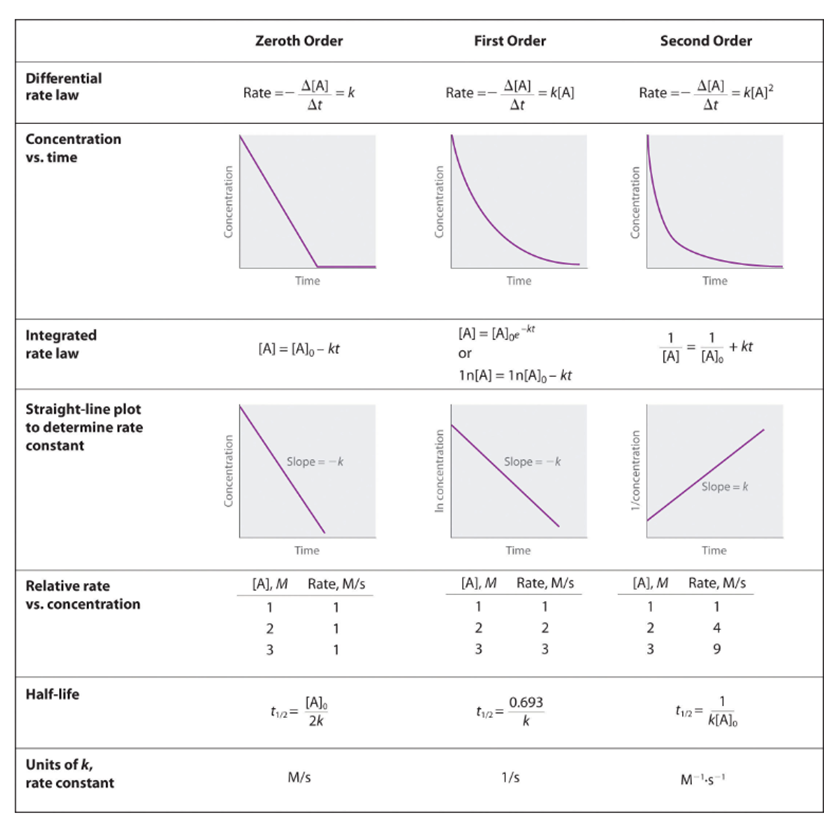

Focusing on the blue plot, since we have established that reactant A is the reactant, its graph shape is likely to either be first order or second order since it shows curvature. However, in order to determine which one it is exactly, we will need to make use of integrated rate laws.
These equations are in a disguised $y = mx + c$ format and each rate order has a unique integrated rate equation that will give a linear plot.

Looking at the integrated rate equations, we can see that for a first order reaction, we plot $ln([A])$ as our $y$ vs $t$ as our $x$. The gradient is $-k$ (the negative of the rate constant). The $y$ intercept will be $[A]_0$. For a second order reaction, we plot $\frac{1}{[A]}$ as our $y$ vs $t$ as our $x$. The gradient is $+k$ (rate constant). The $y$ intercept will also be $[A]_0$. We will not go into the details of the integrations in this demo, but you can find out more about how these equations are derived here: https://chemistrytalk.org/integrated-rate-laws/

We can plot both of these graphs, adding an extra column for these calculations, and see which graph gives a linear plot.

We will preview our dataset again, and can see the 2 new columns:

In [17]:
# Run this cell as it is
data_2["ln([A])"] = np.log(data_2["A"])
data_2["1/[A]"] = 1 / (data_2["A"])
data_2.head()

,t,A,B,C,ln([A]),1/[A]
0,0.000000,0.931115,0.000000,0.189851,-0.071373,1.073982
1,2.040816,0.871808,0.184354,0.195828,-0.137186,1.147041
2,4.081633,0.689588,0.332521,0.195189,-0.371661,1.450142
3,6.122449,0.523002,0.421037,0.245908,-0.648171,1.912040
4,8.163265,0.463176,0.463408,0.265259,-0.769648,2.159007


Text(0, 0.5, '1 / ([A] / mol dm$^{-3}$)')

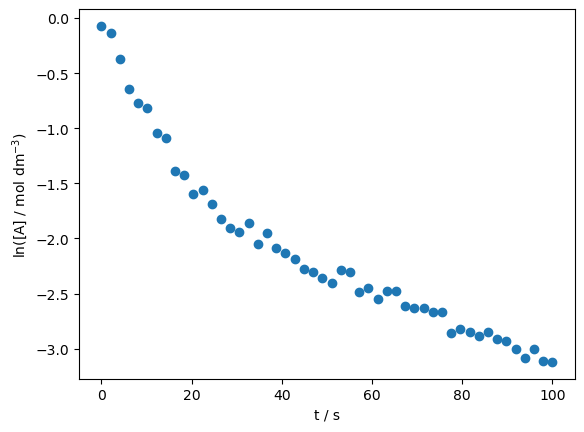

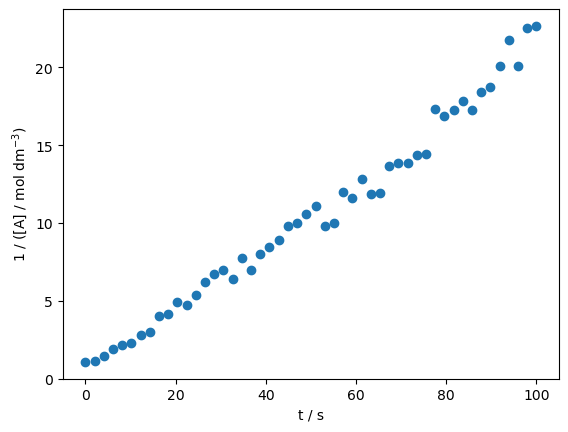

In [18]:
# Run this cell as it is
lnA = data_2["ln([A])"]
recA = data_2["1/[A]"]

fig, ax = plt.subplots()
ax.scatter(t,lnA)
ax.set_xlabel('t / s')
ax.set_ylabel('ln([A] / mol dm$^{-3}$)')

fig, ax = plt.subplots()
ax.scatter(t,recA)
ax.set_xlabel('t / s')
ax.set_ylabel('1 / ([A] / mol dm$^{-3}$)')

We can see that this compares quite well to the pictures of the graph shapes. The second order graph appears to give a more linear plot. We can also verify this quantitatively using the linear regression tool `scikit-learn` by calculating an $R^2$ value. The $R^2$ value ranges from 0 to 1 and measures how well the model predicts the outcome (0 = very poor, 1 = very well). The more linear the graph, the better the fit of the model.

In [19]:
# Run this cell as it is
model_1 = LinearRegression(fit_intercept=True)
x = data_2[["t"]]
y = data_2['ln([A])']
model_1.fit(x, y)
R_squared_1 = model_1.score(x, y)
print(f"R squared is: {R_squared_1}")

R squared is: 0.8934604235514331


In [20]:
# Run this cell as it is
model_2 = LinearRegression(fit_intercept=True)
x = data_2[["t"]]
y = data_2['1/[A]']
model_2.fit(x, y)
R_squared_2 = model_2.score(x, y)
print(f"R squared is: {R_squared_2}")

R squared is: 0.9817812165171789


We can see that both graphs give pretty good $R^2$ values, however as model 2's value is closer to 1 so we can assume that the reaction is second order with respect to reactant A.

We can now use `scikit learn` again, but this time we use linear regression to predict the concentration of reactant at a given time. We can use it to plot a line of best fit from the graph and using this, find the gradient and y intercept from the model, which are the $m$ and $c$ values respectively of a $y = mx + c$ equation.

In [21]:
# Run this cell as it is
from sklearn import linear_model
model = linear_model.LinearRegression(fit_intercept = True)

X = data_2[["t"]]
Y = data_2["1/[A]"]

model.fit(X, Y)

data_2["pred_y"] = model.predict(X)

print("Line gradient from model: ", model.coef_[0])
print("Line intercept from model:", model.intercept_)

Line gradient from model:  0.20725433826978631
Line intercept from model: 0.20093974128978154


The `pred_y` column contains the points for this line of best fit and so we can plot this on the graph (shown in black).

Text(0, 0.5, '1 / ([A] / mol dm$^{-3}$)')

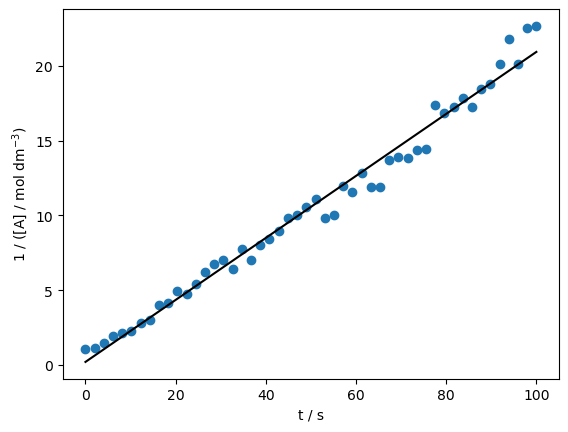

In [28]:
# Run this cell as it is
lnA = data_2["ln([A])"]
recA = data_2["1/[A]"]
pred_Y = data_2["pred_y"]
fig, ax = plt.subplots()
ax.scatter(t,recA)
ax.plot(t,pred_Y,color = "black")
ax.set_xlabel('t / s')
ax.set_ylabel('1 / ([A] / mol dm$^{-3}$)')

Looking back at the integrated rate laws we discussed earlier, we can see that this line essentially represents the integrated rate law equation, which is $\frac{1}{[A]} = \frac{1}{[A]_0} + kt$. We can see that the intercept corresponds to the value of $\frac{1}{[A]_0}$, and the gradient corresponds to the value of $k$, which is our rate constant.

$\frac{1}{[A]} = \frac{1}{[A]_0} + kt$

Substituting the known constants:

$\frac{1}{[A]} = 0.201 + 0.208t$

$y=mx+c$

So say we wanted to find the concentration of reactant A at 120 seconds:

$\frac{1}{[A]} = 0.201 + (0.208 * 120)$

$[A] = \frac{1}{0.201 + (0.208 * 120)}$

$\approx$ $0.0411$ $mol$ $dm^{-3}$

In [23]:
# Run this cell as it is
pred_A = 1 / (model.coef_[0] + (model.intercept_ * 120))
pred_A

0.04111838167054869

**Question (3): From inspection of the initial concentration vs time graph what do you estimate the concentration of reactant A to be at 20 seconds? Type in the code (using the above to help) and see if it matches the estimation.**

*Add some text to the cell below and press the &#9205; Run button (play symbol). To run all the cells again in order press the &#9193; button (fast-forward symbol) and then select the red "Restart and Run All Cells" option.*

In [24]:
## ADD TEXT HERE


**Question (4): Any limitations of predicting at particularly low or high temperatures?**

*Discuss this in groups and add some text to the cell below. Placing a # before the text will tell Python it's a comment, so if you run the cell there won't be an error message.*

In [25]:
## ADD TEXT HERE
#
#

Another thing we can do is plot the residuals as a function of the independent variable $x$.

Tip: to guide the eye when making residuals plots, it can help to use `ax.axhline(0, linestyle='dashed')` to draw a horizontal line at 0 on the y=axis.

Text(0, 0.5, 'Residuals')

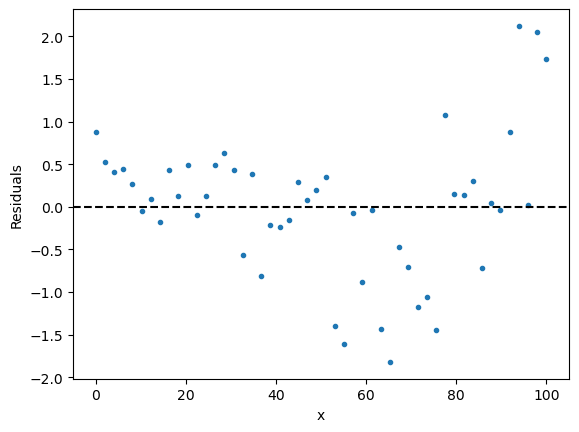

In [26]:
# Run this cell as it is
fig, ax  = plt.subplots()

# Create a plot of residuals
ax.plot(data_2["t"],data_2["1/[A]"] - data_2["pred_y"],'.')

# Add a horizontal line at zero to guide the eye
ax.axhline(0, color='k', linestyle='dashed')

# Add axis labels
ax.set_xlabel("x")
ax.set_ylabel("Residuals")

Similarly, we can also plot this directly using the special `residplot()` function from the `seaborn` library (see https://seaborn.pydata.org/generated/seaborn.residplot.html), which will give us the same result but with fewer lines of code required:

<Axes: xlabel='t', ylabel='1/[A]'>

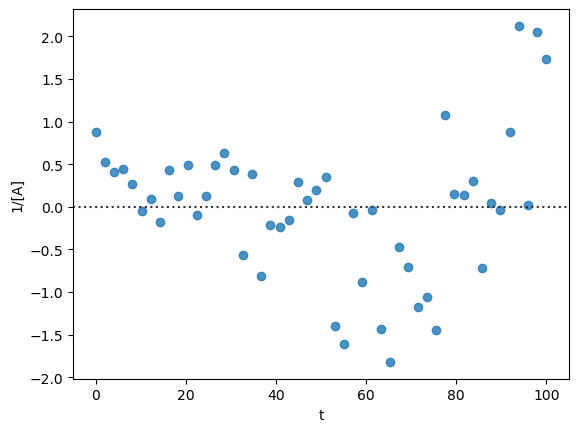

In [27]:
# Run this cell as it is
sns.residplot(data=data_2, x="t", y="1/[A]",  line_kws=dict(color="r"))

The above should show a reasonably symmetrical distribution of residuals about zero. This indicates that our regression model captured the trend in the data. The residuals are relatively evenly distributed over the full range of values of the independent variable $x$, indicating homoscedasticity.

Residuals plots are very useful to help determine whether a particular regression model is appropriate for your data.

The `seaborn` package offers a method to perform a quick regression and visualise the resulting residuals. This is a helpful first check before you embark on your model setup using scikit-learn. If the residuals plot looks reasonable it would give us confidence in moving forward with a linear regression model.